In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=0165396af32cc6d360e629fb6c8f33d193625eba47576b371a4dcc1ac8b39817
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import pyswarm as ps
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from pyswarm import pso


In [ ]:
# Replace 'your_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('DBD.xlsx')

print(df)

     Tahun      Bulan    1    2    3    4    5    6    7    8  ...   25   26  \
0     2008    Januari   50   80   85   66   74   59   94   84  ...  120  107   
1     2008   Februari   78  100   76  146  129  121   75   87  ...  111   86   
2     2008      Maret   66   47  104   98   77   80   73   97  ...  110  126   
3     2008      April  186  128  135  120  177   77  180  162  ...   65   60   
4     2008        Mei  375  198  129  122  209  175  165  149  ...  214  231   
..     ...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
115   2017    Agustus    7   20    9   14   11    9   10    8  ...   11    5   
116   2017  September    6    9   10    9    9   11   10    4  ...    5   18   
117   2017    Oktober    6   16   10   10   23   11   13   10  ...   15   21   
118   2017   November   24   27   16   17   19   20   13   24  ...   20   14   
119   2017   Desember   17   15   20   24   20   14   21   22  ...   17   10   

      27   28     29     30    31      

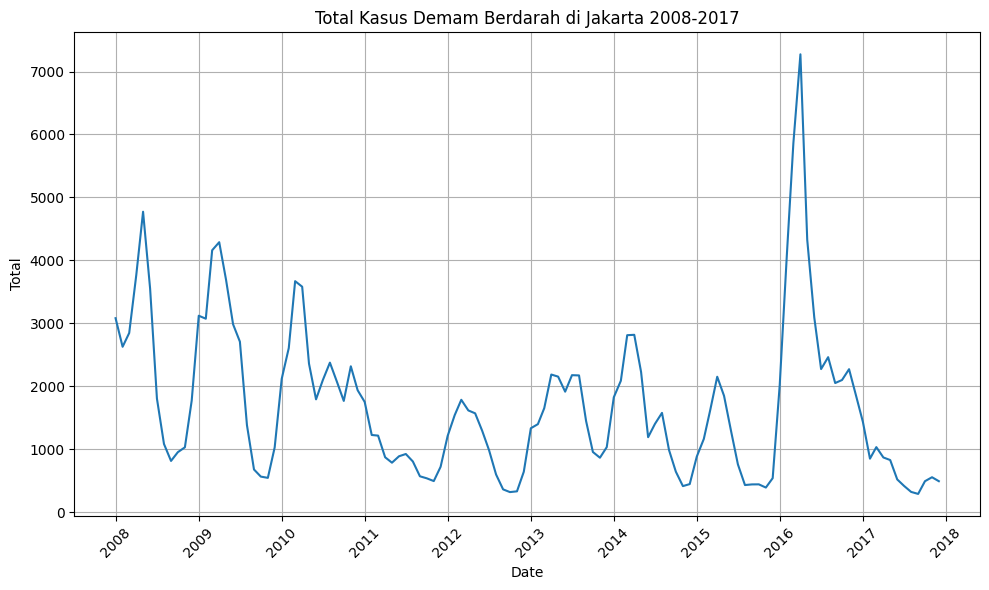

In [ ]:
# Assuming 'Date' and 'Total' are column names in your DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime objects if needed

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Date'], df['total'])
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Total Kasus Demam Berdarah di Jakarta 2008-2017')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

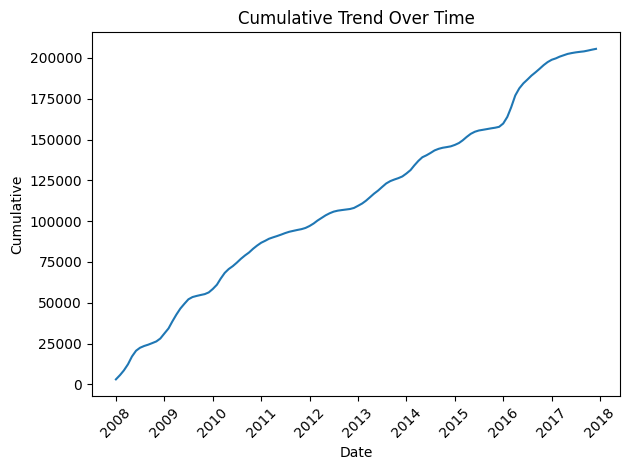

In [ ]:
# Assuming 'Date' is the column name for your date data
# and 'Cumulative' is the column name for your cumulative data
plt.plot(df['Date'], df['cumulative'])
plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<ipython-input-8-c317b1a78cba>:3: RuntimeWarning: overflow encountered in exp
  return A * (1 + np.exp(-k * (t - t0))) ** (-1 / nu)


Stopping search: maximum iterations reached --> 100
Optimal parameters: A=23981.746584222125, k=0.03820279851266371, t0=132.3900952629577, nu=2.673768855243833
Root Mean Squared Error (RMSE): 284.7762262062992
Mean Squared Error (MSE): 81097.49901230128


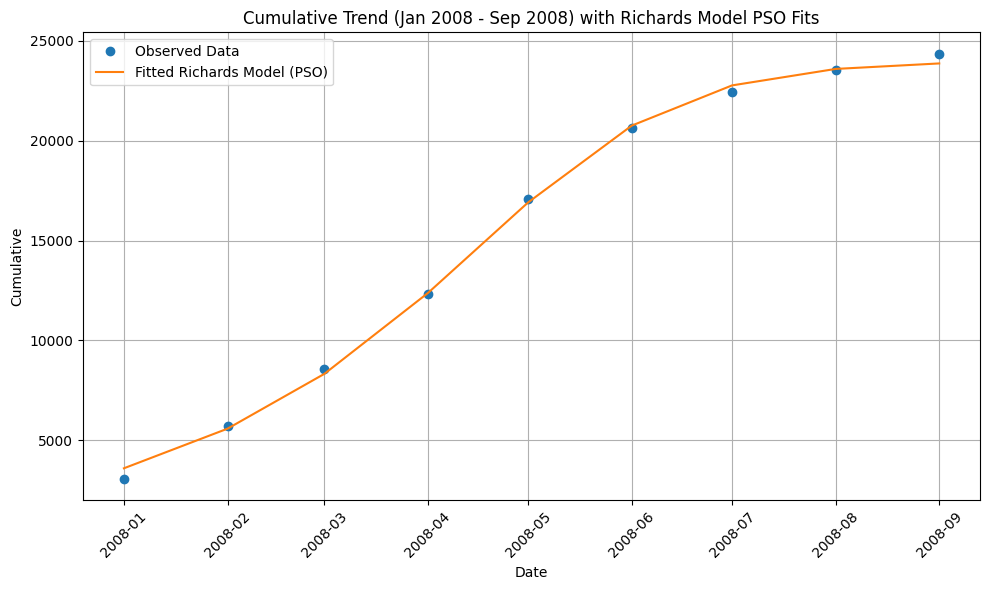

In [ ]:
# Define Richards Model
def richards_model(t, A, k, t0, nu):
    return A * (1 + np.exp(-k * (t - t0))) ** (-1 / nu)
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A, k, t0, nu = params
    y_predicted = richards_model(t, A, k, t0, nu)
    return np.sum((y_observed - y_predicted) ** 2)

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to September 2008
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2008-09-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
lb = [0, 0, min(t_data), 0.01]  # Lower bounds for A, k, t0, nu
ub = [max(y_observed), 10, max(t_data), 5]  # Upper bounds for A, k, t0, nu

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A_opt, k_opt, t0_opt, nu_opt = params_opt
print(f"Optimal parameters: A={A_opt}, k={k_opt}, t0={t0_opt}, nu={nu_opt}")

# After obtaining the optimal parameters from PSO
A_opt, k_opt, t0_opt, nu_opt = params_opt

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A_opt, k_opt, t0_opt, nu_opt)

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse1 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse1}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse1 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse1}")

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Sep 2008) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
t_data

array([  0,  31,  60,  91, 121, 152, 182, 213, 244])

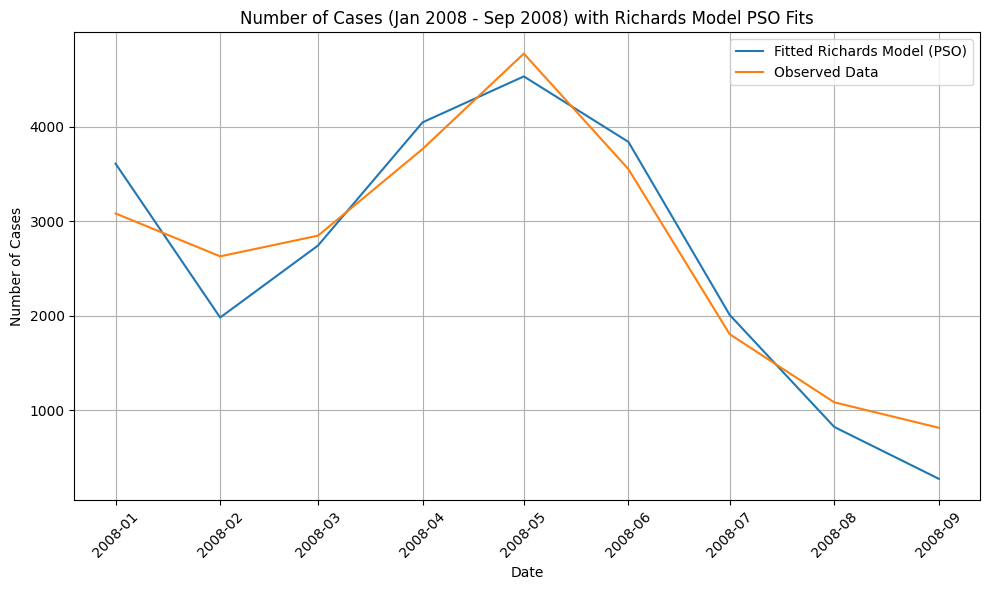

In [ ]:
def richards(t, A1, k1, t01, nu1):
    return A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)

y_predicted = richards(t_data, A_opt, k_opt, t0_opt, nu_opt)
ysubs =np.ones(len(y_predicted))
ysubs[0] = y_predicted[0]
for i in range (1,len(y_predicted)) :
  ysubs[i] = y_predicted[i] - y_predicted[i-1]

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], ysubs, '-', label='Fitted Richards Model (PSO)')
plt.plot(filtered_df['Date'], filtered_df['total'], label='Observed Data')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Number of Cases (Jan 2008 - Sep 2008) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-20-7b9190485da5>:3: RuntimeWarning: overflow encountered in exp
  return A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1) + A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)


Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=24444.869754666044, k1=0.02392797098299498, t01=96.96049573236262, nu1=1.192071950057909, A2=28846.53377411945, k2=0.03351921641057037, t02=476.56257687268766, nu2=2.449338879138041


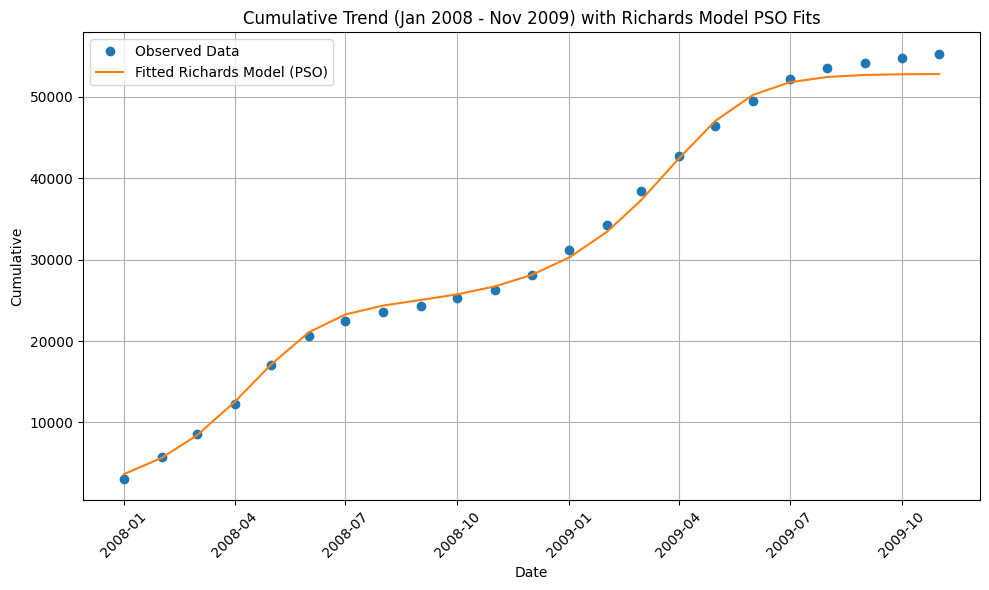

Root Mean Squared Error (RMSE): 950.3888672558154
Mean Squared Error (MSE): 903238.9990037918


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2):
    return A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1) + A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A, k, t0, nu, A2, k2, t02, nu2 = params
    y_predicted = richards_model(t, A, k, t0, nu, A2, k2, t02, nu2)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2009
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2009-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb = [0, 0, min(t_data), 0.01, 0, 0, min(t_data), 0.01]  # Lower bounds for A1, k1, t01, nu1, A2, k2, t02, nu2
ub = [max(y_observed), 10, max(t_data), 5, max(y_observed), 10, max(t_data), 5]  # Upper bounds for A1, k1, t01, nu1, A2, k2, t02, nu2

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt = params_opt
print(f"Optimal parameters: A1={A1_opt}, k1={k1_opt}, t01={t01_opt}, nu1={nu1_opt}, A2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A_opt, k_opt, t0_opt, nu_opt, A2_opt, k2_opt, t02_opt, nu2_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Nov 2009) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse2 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse2}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse2 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse2}")

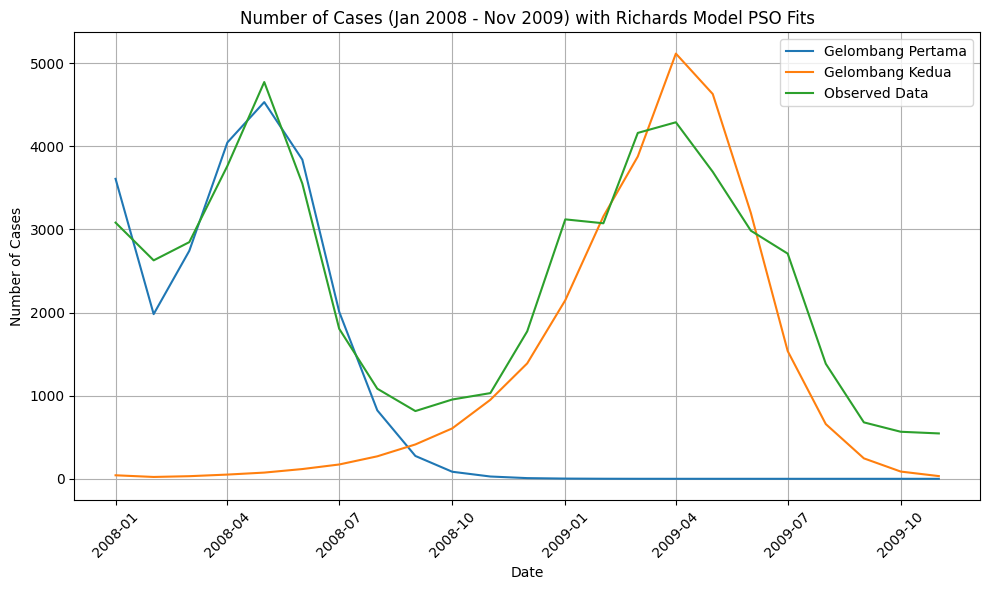

In [ ]:
def richards(t, A1, k1, t01, nu1):
    return A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)

y_predicted1 = richards(t_data, A_opt, k_opt, t0_opt, nu_opt)
y_predicted2 = richards(t_data, A2_opt, k2_opt, t02_opt, nu2_opt)
ysubs1 =np.ones(len(y_predicted1))
ysubs2 =np.ones(len(y_predicted2))
ysubs1[0] = y_predicted1[0]
ysubs2[0] = y_predicted2[0]
for i in range (1,len(y_predicted1)) :
  ysubs1[i] = y_predicted1[i] - y_predicted1[i-1]
  ysubs2[i] = y_predicted2[i] - y_predicted2[i-1]

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], ysubs1, '-', label='Gelombang Pertama')
plt.plot(filtered_df['Date'], ysubs2, '-', label='Gelombang Kedua')
plt.plot(filtered_df['Date'], filtered_df['total'], label='Observed Data')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Number of Cases (Jan 2008 - Nov 2009) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-48-888354cc06ba>:3: RuntimeWarning: overflow encountered in exp
  return A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1) + A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2) + A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)


Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=30118.256938069455, k1=1.8561938822409725, t01=425.52345986790635, nu1=2.1096032409532444, A2=28846.53377411945, k2=0.03351921641057037, t02=476.56257687268766, nu2=2.449338879138041, A3=39530.916362341864, k3=0.017591012066350165, t03=997.2728343626221, nu3=3.2636761982231772


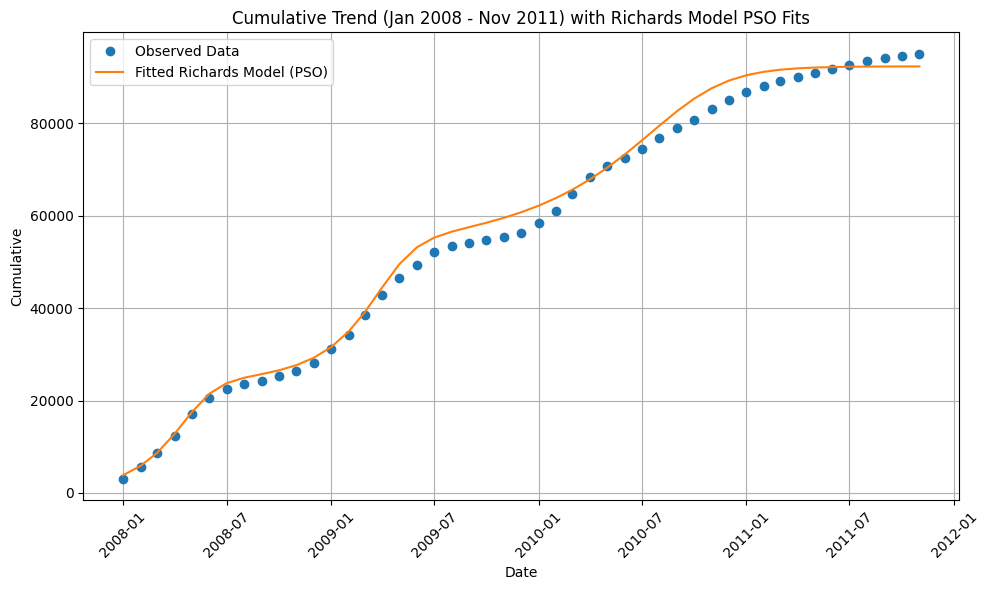

Root Mean Squared Error (RMSE): 2441.2724431786305
Mean Squared Error (MSE): 5959811.141823361


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3):
    return A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1) + A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2) + A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3 = params
    y_predicted = richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2011
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2011-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb = [0, 0, min(t_data), 0.01, 0, 0, min(t_data), 0.01, 0, 0, min(t_data), 0.01]  # Lower bounds for A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3
ub = [max(y_observed), 10, max(t_data), 5, max(y_observed), 10, max(t_data), 5, max(y_observed), 10, max(t_data), 5]  # Upper bounds for A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, Ac_opt, kc_opt, t0c_opt, nuc_opt, A3_opt, k3_opt, t03_opt, nu3_opt = params_opt
print(f"Optimal parameters: A1={A1_opt}, k1={k1_opt}, t01={t01_opt}, nu1={nu1_opt}, A2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}, A3={A3_opt}, k3={k3_opt}, t03={t03_opt}, nu3={nu3_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A_opt, k_opt, t0_opt, nu_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Nov 2011) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse3 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse3}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse3 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse3}")

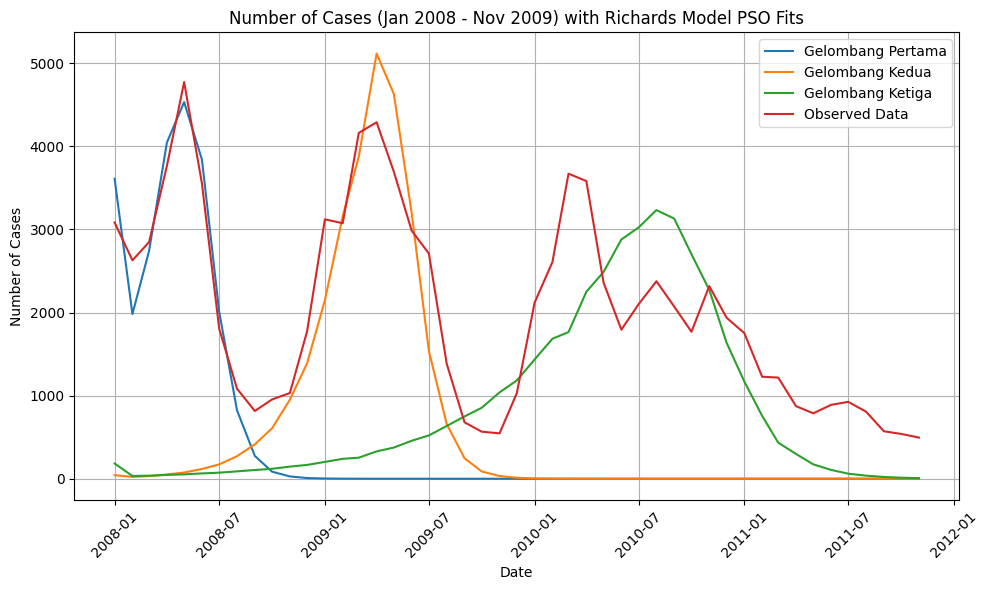

In [ ]:
def richards(t, A1, k1, t01, nu1):
    return A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)

y_predicted1 = richards(t_data, A_opt, k_opt, t0_opt, nu_opt)
y_predicted2 = richards(t_data, A2_opt, k2_opt, t02_opt, nu2_opt)
y_predicted3 = richards(t_data, A3_opt, k3_opt, t03_opt, nu3_opt)
ysubs1 =np.ones(len(y_predicted1))
ysubs2 =np.ones(len(y_predicted2))
ysubs3 =np.ones(len(y_predicted3))
ysubs1[0] = y_predicted1[0]
ysubs2[0] = y_predicted2[0]
ysubs3[0] = y_predicted3[0]
for i in range (1,len(y_predicted1)) :
  ysubs1[i] = y_predicted1[i] - y_predicted1[i-1]
  ysubs2[i] = y_predicted2[i] - y_predicted2[i-1]
  ysubs3[i] = y_predicted3[i] - y_predicted3[i-1]

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], ysubs1, '-', label='Gelombang Pertama')
plt.plot(filtered_df['Date'], ysubs2, '-', label='Gelombang Kedua')
plt.plot(filtered_df['Date'], ysubs3, '-', label='Gelombang Ketiga')
plt.plot(filtered_df['Date'], filtered_df['total'], label='Observed Data')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Number of Cases (Jan 2008 - Nov 2011) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-195-18d26bbaa971>:3: RuntimeWarning: overflow encountered in exp
  richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
<ipython-input-195-18d26bbaa971>:5: RuntimeWarning: overflow encountered in exp
  richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
<ipython-input-195-18d26bbaa971>:6: RuntimeWarning: overflow encountered in exp
  richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
<ipython-input-195-18d26bbaa971>:4: RuntimeWarning: overflow encountered in exp
  richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)


Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=23981.746584222125, k1=0.03820279851266371, t01=132.3900952629577, nu1=2.673768855243833, 
A2=28846.53377411945, k2=0.03351921641057037, t02=476.56257687268766, nu2=2.449338879138041, 
A3=33457.57781629463, k3=0.04530185599750443, t03=952.8044464253406, nu3=4.851258818470585, 
A4=7800.364365204092, k4=2.011181180506411, t04=3.55413196173436, nu4=2.445742813221485


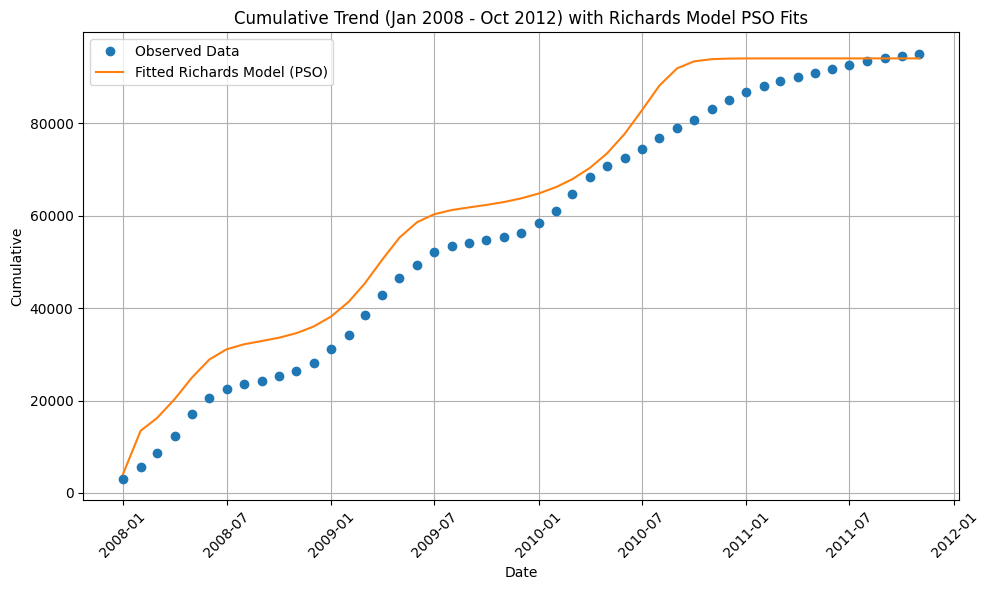

Root Mean Squared Error (RMSE): 7218.798103871259
Mean Squared Error (MSE): 52111046.064455286


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4):
    richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
    richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
    richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
    richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
    return richards1 + richards2 + richards3 + richards4
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4 = params
    y_predicted = richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to October 2012
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2011-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb1 = [0, 0, min(t_data), 0.01]
lb = lb1 + lb1 + lb1 + lb1  # Lower bounds for A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4
ub1 = [max(y_observed), 10, max(t_data), 5]
ub = ub1 + ub1 + ub1 + ub1 # Upper bounds for A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, Aa_opt, ka_opt, t0a_opt, nua_opt, A3_opt, k3_opt, t03_opt, nu3_opt, \
A4_opt, k4_opt, t04_opt, nu4_opt = params_opt
print(f"Optimal parameters: A1={A_opt}, k1={k_opt}, t01={t0_opt}, nu1={nu_opt}, \nA2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}, \
\nA3={A3_opt}, k3={k3_opt}, t03={t03_opt}, nu3={nu3_opt}, \nA4={A4_opt}, k4={k4_opt}, t04={t04_opt}, nu4={nu4_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A_opt, k_opt, t0_opt, nu_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt,
                                 A4_opt, k4_opt, t04_opt, nu4_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Oct 2012) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse4 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse4}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse4 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse4}")

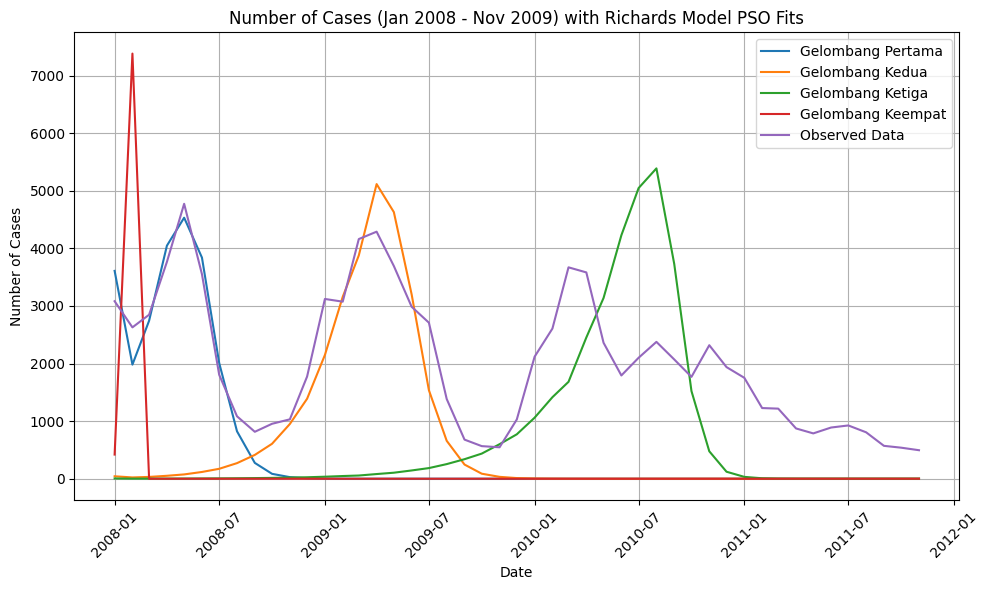

In [ ]:
def richards(t, A1, k1, t01, nu1):
    return A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)

y_predicted1 = richards(t_data, A_opt, k_opt, t0_opt, nu_opt)
y_predicted2 = richards(t_data, A2_opt, k2_opt, t02_opt, nu2_opt)
y_predicted3 = richards(t_data, A3_opt, k3_opt, t03_opt, nu3_opt)
y_predicted4 = richards(t_data, A4_opt, k4_opt, t04_opt, nu4_opt)
ysubs1 =np.ones(len(y_predicted1))
ysubs2 =np.ones(len(y_predicted2))
ysubs3 =np.ones(len(y_predicted3))
ysubs4 =np.ones(len(y_predicted4))
ysubs1[0] = y_predicted1[0]
ysubs2[0] = y_predicted2[0]
ysubs3[0] = y_predicted3[0]
ysubs4[0] = y_predicted4[0]
for i in range (1,len(y_predicted1)) :
  ysubs1[i] = y_predicted1[i] - y_predicted1[i-1]
  ysubs2[i] = y_predicted2[i] - y_predicted2[i-1]
  ysubs3[i] = y_predicted3[i] - y_predicted3[i-1]
  ysubs4[i] = y_predicted4[i] - y_predicted4[i-1]

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], ysubs1, '-', label='Gelombang Pertama')
plt.plot(filtered_df['Date'], ysubs2, '-', label='Gelombang Kedua')
plt.plot(filtered_df['Date'], ysubs3, '-', label='Gelombang Ketiga')
plt.plot(filtered_df['Date'], ysubs4, '-', label='Gelombang Keempat')
plt.plot(filtered_df['Date'], filtered_df['total'], label='Observed Data')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Number of Cases (Jan 2008 - Nov 2009) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-179-7564b303e1eb>:5: RuntimeWarning: overflow encountered in exp
  richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
<ipython-input-179-7564b303e1eb>:6: RuntimeWarning: overflow encountered in exp
  richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
<ipython-input-179-7564b303e1eb>:7: RuntimeWarning: overflow encountered in exp
  richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
<ipython-input-179-7564b303e1eb>:3: RuntimeWarning: overflow encountered in exp
  richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
<ipython-input-179-7564b303e1eb>:4: RuntimeWarning: overflow encountered in exp
  richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)


Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=2722.8282164799834, k1=0.002628886150865056, t01=1338.6939820352347, nu1=3.7426852938169515, 
A2=18714.465355995297, k2=5.841331221266195, t02=820.8428612226885, nu2=0.5451964590217125, 
A3=48390.41146172812, k3=0.006508060880730784, t03=1601.9000306748285, nu3=3.299998218366087, 
A4=28546.400954279936, k4=4.783452239390664, t04=425.589680893861, nu4=4.435714230056535, 
A5=17587.248127545085, k5=4.391573974853257, t05=81.10541913846944, nu5=3.6999389633867086


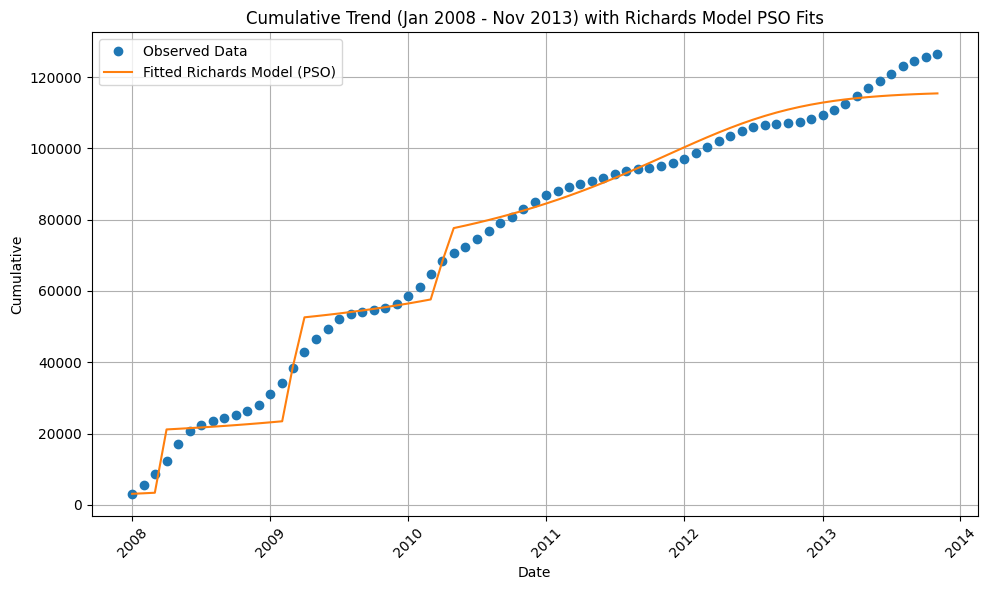

Root Mean Squared Error (RMSE): 4328.677376857395
Mean Squared Error (MSE): 18737447.832917016


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5):
    richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
    richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
    richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
    richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
    richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
    return richards1 + richards2 + richards3 + richards4 + richards5
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5 = params
    y_predicted = richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2013
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2013-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb1 = [0, 0, min(t_data), 0.01]
lb = lb1 + lb1 + lb1 + lb1 + lb1  # Lower bounds for A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4
ub1 = [max(y_observed), 10, max(t_data), 5]
ub = ub1 + ub1 + ub1 + ub1 + ub1# Upper bounds for A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt, \
A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt = params_opt
print(f"Optimal parameters: A1={A1_opt}, k1={k1_opt}, t01={t01_opt}, nu1={nu1_opt}, \nA2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}, \
\nA3={A3_opt}, k3={k3_opt}, t03={t03_opt}, nu3={nu3_opt}, \nA4={A4_opt}, k4={k4_opt}, t04={t04_opt}, nu4={nu4_opt}, \
\nA5={A5_opt}, k5={k5_opt}, t05={t05_opt}, nu5={nu5_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt,
                                 A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Nov 2013) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse5 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse5}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse5 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse5}")

<ipython-input-187-418cd589634c>:4: RuntimeWarning: overflow encountered in exp
  richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
<ipython-input-187-418cd589634c>:5: RuntimeWarning: overflow encountered in exp
  richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
<ipython-input-187-418cd589634c>:6: RuntimeWarning: overflow encountered in exp
  richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
<ipython-input-187-418cd589634c>:7: RuntimeWarning: overflow encountered in exp
  richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
<ipython-input-187-418cd589634c>:8: RuntimeWarning: overflow encountered in exp
  richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
<ipython-input-187-418cd589634c>:9: RuntimeWarning: overflow encountered in exp
  richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)


Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=25467.81177864176, k1=3.3718938805639795, t01=821.7766219723492, nu1=3.5436404566317905, 
A2=39129.628329258616, k2=0.021061095245053375, t02=462.832082449467, nu2=2.518858853938343, 
A3=14805.628792426682, k3=7.915476433710004, t03=2280.602968867271, nu3=4.910447555411094, 
A4=23578.706473440707, k4=7.943107640546708, t04=1917.386856545262, nu4=4.328701152727338, 
A5=22125.487096215333, k5=0.018196907051496153, t05=1420.386365841953, nu5=3.280389634052283, 
A6=16521.48280696601, k6=8.678142089494013, t06=73.50450658377913, nu6=2.98951927269102


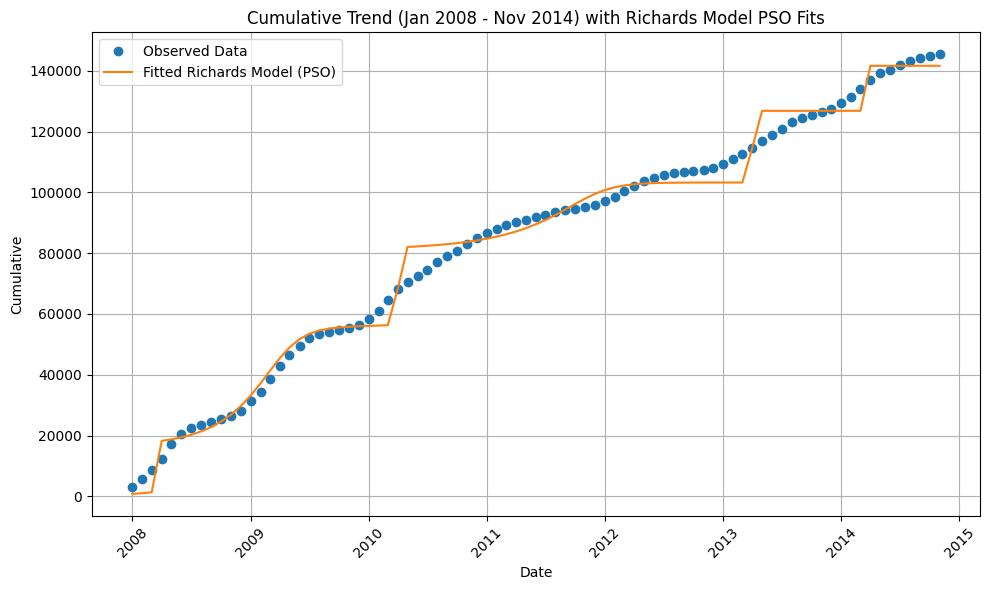

Root Mean Squared Error (RMSE): 4043.263286924477
Mean Squared Error (MSE): 16347978.007391326


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                   A6, k6, t06, nu6):
    richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
    richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
    richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
    richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
    richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
    richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
    return richards1 + richards2 + richards3 + richards4 + richards5 + richards6
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
    A6, k6, t06, nu6 = params
    y_predicted = richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                                 A6, k6, t06, nu6)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2013
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2014-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb1 = [0, 0, min(t_data), 0.01]
lb = lb1 + lb1 + lb1 + lb1 + lb1 + lb1  # Lower bounds for A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4
ub1 = [max(y_observed), 10, max(t_data), 5]
ub = ub1 + ub1 + ub1 + ub1 + ub1 + ub1 # Upper bounds for A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt, \
A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt = params_opt
print(f"Optimal parameters: A1={A1_opt}, k1={k1_opt}, t01={t01_opt}, nu1={nu1_opt}, \nA2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}, \
\nA3={A3_opt}, k3={k3_opt}, t03={t03_opt}, nu3={nu3_opt}, \nA4={A4_opt}, k4={k4_opt}, t04={t04_opt}, nu4={nu4_opt}, \
\nA5={A5_opt}, k5={k5_opt}, t05={t05_opt}, nu5={nu5_opt}, \nA6={A6_opt}, k6={k6_opt}, t06={t06_opt}, nu6={nu6_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt,
                                 A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Nov 2014) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse6 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse6}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse6 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse6}")

<ipython-input-230-24bd9d518ee2>:4: RuntimeWarning: overflow encountered in exp
  richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
<ipython-input-230-24bd9d518ee2>:5: RuntimeWarning: overflow encountered in exp
  richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
<ipython-input-230-24bd9d518ee2>:6: RuntimeWarning: overflow encountered in exp
  richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
<ipython-input-230-24bd9d518ee2>:7: RuntimeWarning: overflow encountered in exp
  richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
<ipython-input-230-24bd9d518ee2>:8: RuntimeWarning: overflow encountered in exp
  richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
<ipython-input-230-24bd9d518ee2>:9: RuntimeWarning: overflow encountered in exp
  richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
<ipython-input-230-24bd9d518ee2>:10: RuntimeWarning: overflow encountered in exp
  richards7 = A7 * (1 + np.exp(-k7 * (t - t07))) ** (-1 / nu7

Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=16873.498457697537, k1=2.540716906165341, t01=2840.8154120226477, nu1=4.9991293817396185, 
A2=30205.4334488371, k2=7.382183917802943, t02=107.69943824318487, nu2=4.541432860768516, 
A3=529.076881340915, k3=2.0243627809130107, t03=2860.764610673512, nu3=4.4167964145568535, 
A4=19015.94694547812, k4=9.765692204071485, t04=1492.2001237901072, nu4=2.3523405049937556, 
A5=23671.387170691967, k5=3.1688657210677835, t05=441.84730773394784, nu5=4.443828476906069, 
A6=40236.66198145176, k6=0.0075092723394739255, t06=2027.1337531021743, nu6=0.41018868615039294, 
A7=36442.77577869213, k7=5.67763955431458, t07=882.4443578668607, nu7=3.850559663533827


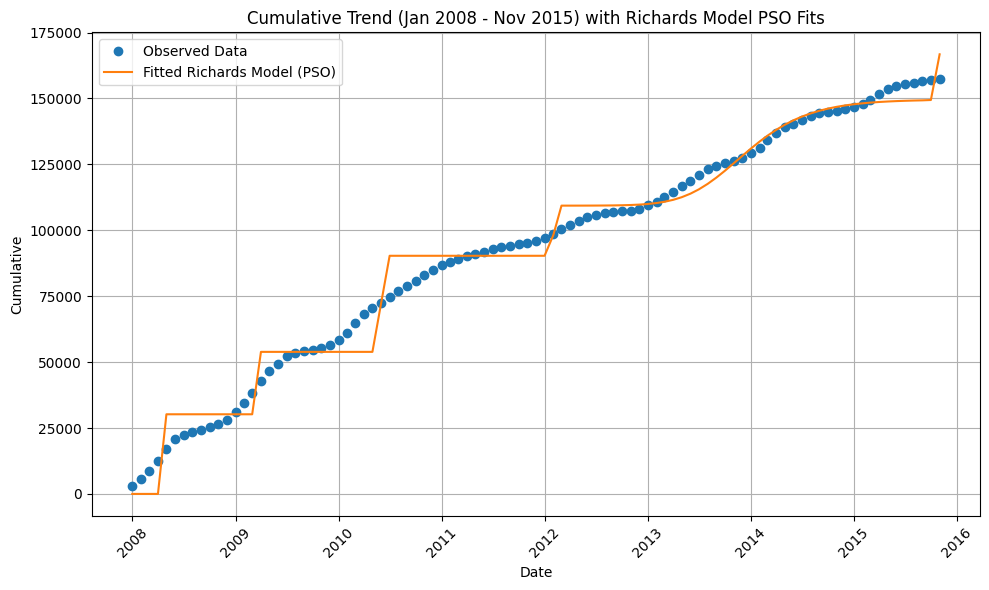

Root Mean Squared Error (RMSE): 5925.9594151422025
Mean Squared Error (MSE): 35116994.98991251


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                   A6, k6, t06, nu6, A7, k7, t07, nu7):
    richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
    richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
    richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
    richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
    richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
    richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
    richards7 = A7 * (1 + np.exp(-k7 * (t - t07))) ** (-1 / nu7)
    return richards1 + richards2 + richards3 + richards4 + richards5 + richards6 + richards7
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
    A6, k6, t06, nu6, A7, k7, t07, nu7 = params
    y_predicted = richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                                 A6, k6, t06, nu6, A7, k7, t07, nu7)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2013
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2015-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb1 = [0, 0, min(t_data), 0.01]
lb = lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 # Lower bounds
ub1 = [max(y_observed), 10, max(t_data), 5]
ub = ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 # Upper bounds

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt, \
A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt, \
A7_opt, k7_opt, t07_opt, nu7_opt = params_opt
print(f"Optimal parameters: A1={A1_opt}, k1={k1_opt}, t01={t01_opt}, nu1={nu1_opt}, \nA2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}, \
\nA3={A3_opt}, k3={k3_opt}, t03={t03_opt}, nu3={nu3_opt}, \nA4={A4_opt}, k4={k4_opt}, t04={t04_opt}, nu4={nu4_opt}, \
\nA5={A5_opt}, k5={k5_opt}, t05={t05_opt}, nu5={nu5_opt}, \nA6={A6_opt}, k6={k6_opt}, t06={t06_opt}, nu6={nu6_opt}, \
\nA7={A7_opt}, k7={k7_opt}, t07={t07_opt}, nu7={nu7_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt,
                                 A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt,
                                 A7_opt, k7_opt, t07_opt, nu7_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Nov 2015) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse7 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse7}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse7 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse7}")

<ipython-input-282-ca34dd79e55a>:4: RuntimeWarning: overflow encountered in exp
  richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
<ipython-input-282-ca34dd79e55a>:5: RuntimeWarning: overflow encountered in exp
  richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
<ipython-input-282-ca34dd79e55a>:6: RuntimeWarning: overflow encountered in exp
  richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
<ipython-input-282-ca34dd79e55a>:7: RuntimeWarning: overflow encountered in exp
  richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
<ipython-input-282-ca34dd79e55a>:8: RuntimeWarning: overflow encountered in exp
  richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
<ipython-input-282-ca34dd79e55a>:9: RuntimeWarning: overflow encountered in exp
  richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
<ipython-input-282-ca34dd79e55a>:10: RuntimeWarning: overflow encountered in exp
  richards7 = A7 * (1 + np.exp(-k7 * (t - t07))) ** (-1 / nu7

Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=35779.64728349322, k1=2.7819197497260477, t01=3013.1860510160773, nu1=1.561598918036134, 
A2=22326.697565409457, k2=3.625119843179875, t02=2497.0154806810283, nu2=4.491484064450646, 
A3=63076.37176968332, k3=0.005180641919069186, t03=1176.5525403040708, nu3=1.6599539714857736, 
A4=23857.431341941046, k4=6.978802900503793, t04=2184.5632500732736, nu4=3.290256047947749, 
A5=28714.39653930194, k5=2.006001884219342, t05=456.5564951428554, nu5=2.3698762767428208, 
A6=4542.740732331712, k6=7.677708154758228, t06=3162.7739716469564, nu6=2.7031716038259463, 
A7=19901.43529187702, k7=9.77732066151466, t07=46.502169810299264, nu7=2.514557074723762, 
A8=99.51235908553181, k8=7.977550925202129, t08=271.744029069509, nu8=0.7257038562810825


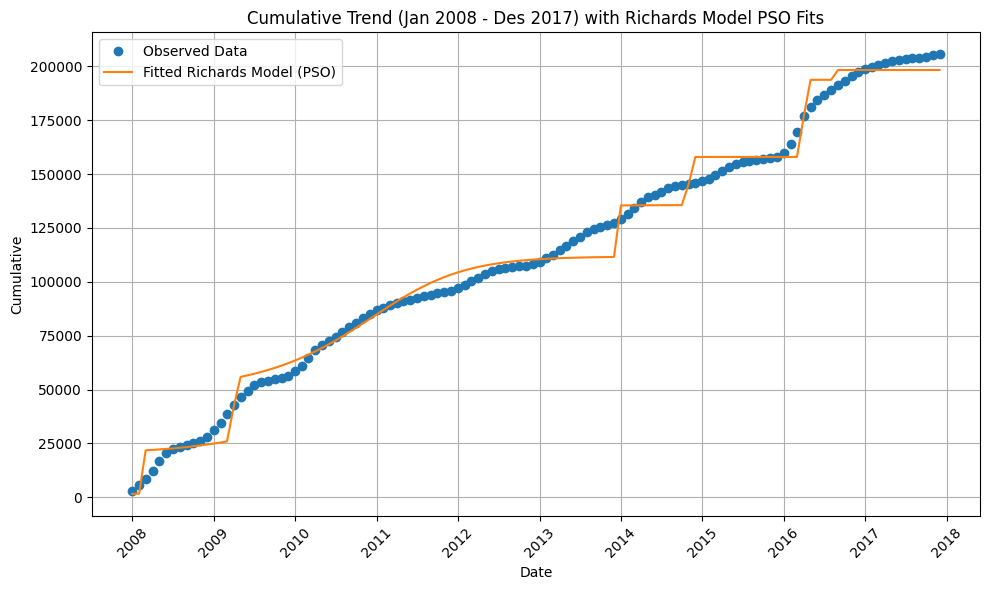

Root Mean Squared Error (RMSE): 6037.963733549036
Mean Squared Error (MSE): 36457006.047653414


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                   A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8):
    richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
    richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
    richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
    richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
    richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
    richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
    richards7 = A7 * (1 + np.exp(-k7 * (t - t07))) ** (-1 / nu7)
    richards8 = A8 * (1 + np.exp(-k8 * (t - t08))) ** (-1 / nu8)
    return richards1 + richards2 + richards3 + richards4 + richards5 + richards6 + richards7 + richards8
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
    A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8 = params
    y_predicted = richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                                 A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2013
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2017-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb1 = [0, 0, min(t_data), 0.01]
lb = lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 # Lower bounds
ub1 = [max(y_observed), 10, max(t_data), 5]
ub = ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 # Upper bounds

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt, \
A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt, \
A7_opt, k7_opt, t07_opt, nu7_opt, A8_opt, k8_opt, t08_opt, nu8_opt = params_opt
print(f"Optimal parameters: A1={A1_opt}, k1={k1_opt}, t01={t01_opt}, nu1={nu1_opt}, \nA2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}, \
\nA3={A3_opt}, k3={k3_opt}, t03={t03_opt}, nu3={nu3_opt}, \nA4={A4_opt}, k4={k4_opt}, t04={t04_opt}, nu4={nu4_opt}, \
\nA5={A5_opt}, k5={k5_opt}, t05={t05_opt}, nu5={nu5_opt}, \nA6={A6_opt}, k6={k6_opt}, t06={t06_opt}, nu6={nu6_opt}, \
\nA7={A7_opt}, k7={k7_opt}, t07={t07_opt}, nu7={nu7_opt}, \nA8={A8_opt}, k8={k8_opt}, t08={t08_opt}, nu8={nu8_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt,
                                 A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt,
                                 A7_opt, k7_opt, t07_opt, nu7_opt, A8_opt, k8_opt, t08_opt, nu8_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Des 2017) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse8 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse8}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse8 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse8}")

<ipython-input-445-c9d4ef044aa7>:4: RuntimeWarning: overflow encountered in exp
  richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
<ipython-input-445-c9d4ef044aa7>:5: RuntimeWarning: overflow encountered in exp
  richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
<ipython-input-445-c9d4ef044aa7>:6: RuntimeWarning: overflow encountered in exp
  richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
<ipython-input-445-c9d4ef044aa7>:7: RuntimeWarning: overflow encountered in exp
  richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
<ipython-input-445-c9d4ef044aa7>:8: RuntimeWarning: overflow encountered in exp
  richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
<ipython-input-445-c9d4ef044aa7>:9: RuntimeWarning: overflow encountered in exp
  richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
<ipython-input-445-c9d4ef044aa7>:10: RuntimeWarning: overflow encountered in exp
  richards7 = A7 * (1 + np.exp(-k7 * (t - t07))) ** (-1 / nu7

Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=0.0, k1=5.238761925612203, t01=3474.5202332144995, nu1=2.285030173475151, 
A2=68652.70764191663, k2=0.0, t02=1839.2527887283836, nu2=0.02080253774265826, 
A3=32899.802818387936, k3=8.50918425339052, t03=851.3380645066374, nu3=4.426848016493002, 
A4=134030.92855901405, k4=0.004577341939136262, t04=3171.8224260182415, nu4=5.0, 
A5=11.205414733148936, k5=8.593874035207229, t05=2215.036968086751, nu5=4.998885418453628, 
A6=0.0, k6=3.376927674934345, t06=909.2555366941918, nu6=0.01, 
A7=24194.090795220203, k7=4.596618822383546, t07=425.60350877434314, nu7=4.999989195593386, 
A8=164775.26518073963, k8=9.997297427869238, t08=3622.0, nu8=0.2717452538746621, 
A9=13764.599616835318, k9=8.53792482118036, t09=0.0, nu9=0.01


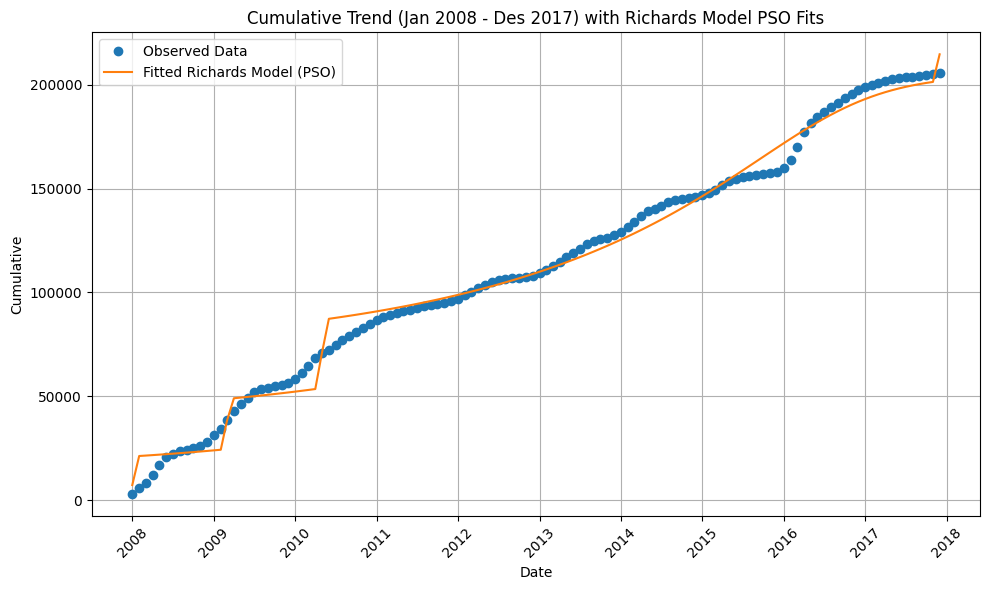

Root Mean Squared Error (RMSE): 5634.545868603174
Mean Squared Error (MSE): 31748107.1453931


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                   A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8, A9, k9, t09, nu9):
    richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
    richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
    richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
    richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
    richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
    richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
    richards7 = A7 * (1 + np.exp(-k7 * (t - t07))) ** (-1 / nu7)
    richards8 = A8 * (1 + np.exp(-k8 * (t - t08))) ** (-1 / nu8)
    richards9 = A9 * (1 + np.exp(-k9 * (t - t09))) ** (-1 / nu9)
    return richards1 + richards2 + richards3 + richards4 + richards5 + richards6 + richards7 + richards8 + richards9
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
    A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8, A9, k9, t09, nu9 = params
    y_predicted = richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                                 A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8, A9, k9, t09, nu9)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2013
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2017-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb1 = [0, 0, min(t_data), 0.01]
lb = lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 # Lower bounds
ub1 = [max(y_observed), 10, max(t_data), 5]
ub = ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 # Upper bounds

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt, \
A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt, \
A7_opt, k7_opt, t07_opt, nu7_opt, A8_opt, k8_opt, t08_opt, nu8_opt, A9_opt, k9_opt, t09_opt, nu9_opt = params_opt
print(f"Optimal parameters: A1={A1_opt}, k1={k1_opt}, t01={t01_opt}, nu1={nu1_opt}, \nA2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}, \
\nA3={A3_opt}, k3={k3_opt}, t03={t03_opt}, nu3={nu3_opt}, \nA4={A4_opt}, k4={k4_opt}, t04={t04_opt}, nu4={nu4_opt}, \
\nA5={A5_opt}, k5={k5_opt}, t05={t05_opt}, nu5={nu5_opt}, \nA6={A6_opt}, k6={k6_opt}, t06={t06_opt}, nu6={nu6_opt}, \
\nA7={A7_opt}, k7={k7_opt}, t07={t07_opt}, nu7={nu7_opt}, \nA8={A8_opt}, k8={k8_opt}, t08={t08_opt}, nu8={nu8_opt}, \
\nA9={A9_opt}, k9={k9_opt}, t09={t09_opt}, nu9={nu9_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt,
                                 A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt,
                                 A7_opt, k7_opt, t07_opt, nu7_opt, A8_opt, k8_opt, t08_opt, nu8_opt, A9_opt, k9_opt, t09_opt, nu9_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Des 2017) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse9 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse9}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse9 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse9}")

<ipython-input-409-7049272eb83c>:4: RuntimeWarning: overflow encountered in exp
  richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
<ipython-input-409-7049272eb83c>:6: RuntimeWarning: overflow encountered in exp
  richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
<ipython-input-409-7049272eb83c>:7: RuntimeWarning: overflow encountered in exp
  richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
<ipython-input-409-7049272eb83c>:8: RuntimeWarning: overflow encountered in exp
  richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
<ipython-input-409-7049272eb83c>:9: RuntimeWarning: overflow encountered in exp
  richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
<ipython-input-409-7049272eb83c>:10: RuntimeWarning: overflow encountered in exp
  richards7 = A7 * (1 + np.exp(-k7 * (t - t07))) ** (-1 / nu7)
<ipython-input-409-7049272eb83c>:11: RuntimeWarning: overflow encountered in exp
  richards8 = A8 * (1 + np.exp(-k8 * (t - t08))) ** (-1 / nu

Stopping search: maximum iterations reached --> 100
Optimal parameters: A1=7010.186605700556, k1=1.1024116405066808, t01=3117.2657880158886, nu1=3.1634972956414207, 
A2=34359.41000754468, k2=0.0011889931472697322, t02=2325.7907990404856, nu2=4.238023693490337, 
A3=23505.790386115452, k3=5.502173459794935, t03=1670.2108312404605, nu3=0.12284853090911578, 
A4=31426.159765055843, k4=5.6964437223087145, t04=3043.0182082176557, nu4=1.5243281912563524, 
A5=11166.387195955283, k5=9.764432008674481, t05=3608.110654366499, nu5=4.38100543766363, 
A6=21110.3770574775, k6=5.00683997337129, t06=2521.416591767838, nu6=2.6875128854870796, 
A7=11774.247754753593, k7=0.548449027711565, t07=2637.177179360064, nu7=4.733483339463323, 
A8=57540.11519726552, k8=0.015328302441030218, t08=956.566620557232, nu8=4.995543086942329, 
A9=8106.380479373168, k9=7.9660135182727, t09=375.40917064484233, nu9=1.2566948168611525, 
A10=8616.060525466775, k10=2.6113731140378524, t010=1925.7675857591291, nu10=1.928733700690

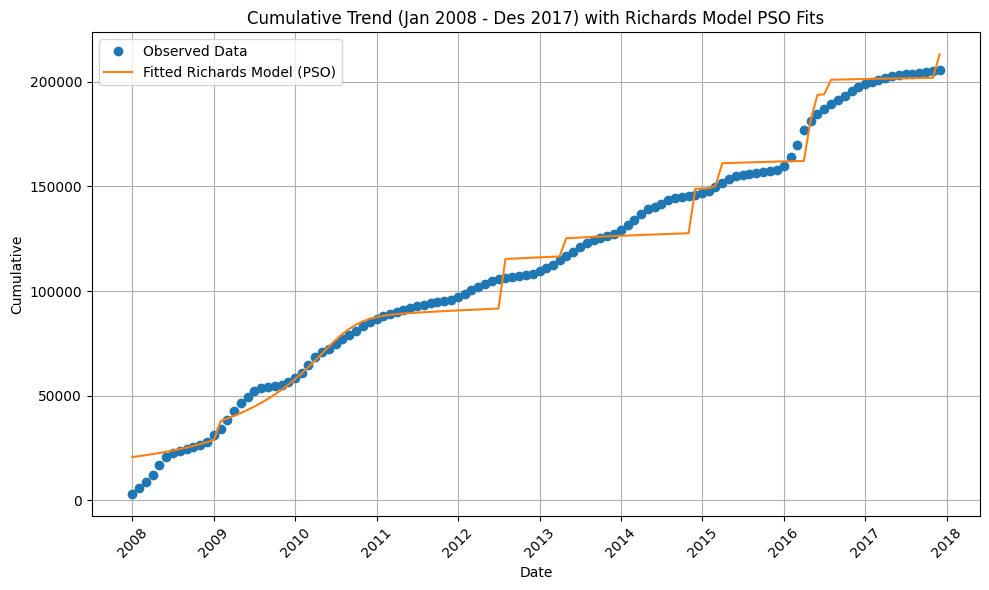

Root Mean Squared Error (RMSE): 6957.684832118641
Mean Squared Error (MSE): 48409378.22309379


In [ ]:
# Define Richards Model
def richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                   A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8, A9, k9, t09, nu9, A10, k10, t010, nu10):
    richards1 = A1 * (1 + np.exp(-k1 * (t - t01))) ** (-1 / nu1)
    richards2 = A2 * (1 + np.exp(-k2 * (t - t02))) ** (-1 / nu2)
    richards3 = A3 * (1 + np.exp(-k3 * (t - t03))) ** (-1 / nu3)
    richards4 = A4 * (1 + np.exp(-k4 * (t - t04))) ** (-1 / nu4)
    richards5 = A5 * (1 + np.exp(-k5 * (t - t05))) ** (-1 / nu5)
    richards6 = A6 * (1 + np.exp(-k6 * (t - t06))) ** (-1 / nu6)
    richards7 = A7 * (1 + np.exp(-k7 * (t - t07))) ** (-1 / nu7)
    richards8 = A8 * (1 + np.exp(-k8 * (t - t08))) ** (-1 / nu8)
    richards9 = A9 * (1 + np.exp(-k9 * (t - t09))) ** (-1 / nu9)
    richards10 = A10 * (1 + np.exp(-k10 * (t - t010))) ** (-1 / nu10)
    return richards1 + richards2 + richards3 + richards4 + richards5 + richards6 + richards7 + richards8 + richards9 + richards10
# A is the upper asymptote (carrying capacity),
# k is the growth rate,
# t0 is the inflection point (the time at which the growth rate is maximum),
# nu(or sometimes is a shape parameter that allows the model to accommodate different growth shapes (flexibility).

# Define the objective function (sum of squared errors)
def objective_function(params, t, y_observed):
    A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
    A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8, A9, k9, t09, nu9, A10, k10, t010, nu10 = params
    y_predicted = richards_model(t, A1, k1, t01, nu1, A2, k2, t02, nu2, A3, k3, t03, nu3, A4, k4, t04, nu4, A5, k5, t05, nu5,\
                                 A6, k6, t06, nu6, A7, k7, t07, nu7, A8, k8, t08, nu8, A9, k9, t09, nu9, A10, k10, t010, nu10)
    return np.sum((y_observed - y_predicted) ** 2)

# ... (Your existing code for loading data and filtering) ...
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2013
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2017-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Time data and observed data (y_observed)
t_data = np.array((filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values)  # Fill in your time points
y_observed = np.array(filtered_df['cumulative'].values)  # Fill in your observed data points

# Define parameter bounds (to avoid unrealistic values)
# Updated bounds for 8 parameters
lb1 = [0, 0, min(t_data), 0.01]
lb = lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 + lb1 # Lower bounds
ub1 = [max(y_observed), 10, max(t_data), 5]
ub = ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 + ub1 # Upper bounds

# Run PSO to optimize parameters
params_opt, _ = pso(objective_function, lb, ub, args=(t_data, y_observed))

# Output optimal parameters
A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt, \
A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt, \
A7_opt, k7_opt, t07_opt, nu7_opt, A8_opt, k8_opt, t08_opt, nu8_opt, A9_opt, k9_opt, t09_opt, nu9_opt, \
A10_opt, k10_opt, t010_opt, nu10_opt = params_opt
print(f"Optimal parameters: A1={A1_opt}, k1={k1_opt}, t01={t01_opt}, nu1={nu1_opt}, \nA2={A2_opt}, k2={k2_opt}, t02={t02_opt}, nu2={nu2_opt}, \
\nA3={A3_opt}, k3={k3_opt}, t03={t03_opt}, nu3={nu3_opt}, \nA4={A4_opt}, k4={k4_opt}, t04={t04_opt}, nu4={nu4_opt}, \
\nA5={A5_opt}, k5={k5_opt}, t05={t05_opt}, nu5={nu5_opt}, \nA6={A6_opt}, k6={k6_opt}, t06={t06_opt}, nu6={nu6_opt}, \
\nA7={A7_opt}, k7={k7_opt}, t07={t07_opt}, nu7={nu7_opt}, \nA8={A8_opt}, k8={k8_opt}, t08={t08_opt}, nu8={nu8_opt}, \
\nA9={A9_opt}, k9={k9_opt}, t09={t09_opt}, nu9={nu9_opt}, \nA10={A10_opt}, k10={k10_opt}, t010={t010_opt}, nu10={nu10_opt}")

# Generate predicted values using the optimal parameters
y_predicted_pso = richards_model(t_data, A1_opt, k1_opt, t01_opt, nu1_opt, A2_opt, k2_opt, t02_opt, nu2_opt, A3_opt, k3_opt, t03_opt, nu3_opt,
                                 A4_opt, k4_opt, t04_opt, nu4_opt, A5_opt, k5_opt, t05_opt, nu5_opt, A6_opt, k6_opt, t06_opt, nu6_opt,
                                 A7_opt, k7_opt, t07_opt, nu7_opt, A8_opt, k8_opt, t08_opt, nu8_opt, A9_opt, k9_opt, t09_opt, nu9_opt,
                                 A10_opt, k10_opt, t010_opt, nu10_opt)

# Plot the data, the fitted curve from curve_fit, and the PSO fitted curve
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], y_observed, 'o', label='Observed Data')
plt.plot(filtered_df['Date'], y_predicted_pso, '-', label='Fitted Richards Model (PSO)')

plt.xlabel('Date')
plt.ylabel('Cumulative')
plt.title('Cumulative Trend (Jan 2008 - Des 2017) with Richards Model PSO Fits')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate MSE for each date
mse_values = (y_observed - y_predicted_pso)**2

# Calculate RMSE
rmse10 = np.sqrt(np.mean(mse_values))
print(f"Root Mean Squared Error (RMSE): {rmse10}")

# Calculate MSE (already calculated above, but printing again for clarity)
mse10 = np.mean(mse_values)
print(f"Mean Squared Error (MSE): {mse10}")

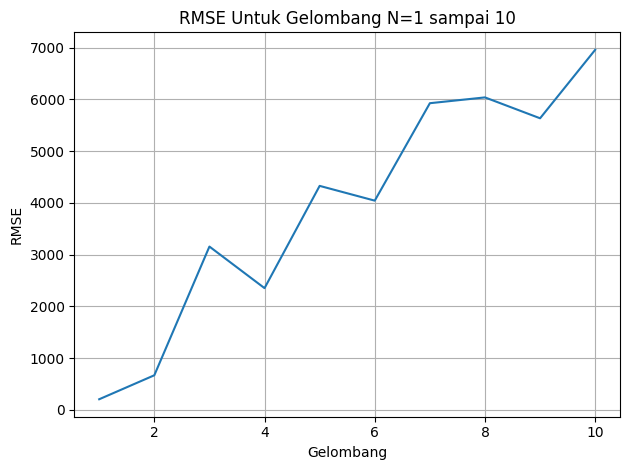

In [ ]:
t = np.array([1,2,3,4,5,6,7,8,9,10])
err = np.array([rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8, rmse9, rmse10])
plt.plot(t,err)
plt.xlabel('Gelombang')
plt.ylabel('RMSE')
plt.title('RMSE Untuk Gelombang N=1 sampai 10')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-6-fb3152c55d9c>:34: RuntimeWarning: overflow encountered in exp
  return a + (c - a) * (1 + (b * np.exp(-d * t))) ** (-1)


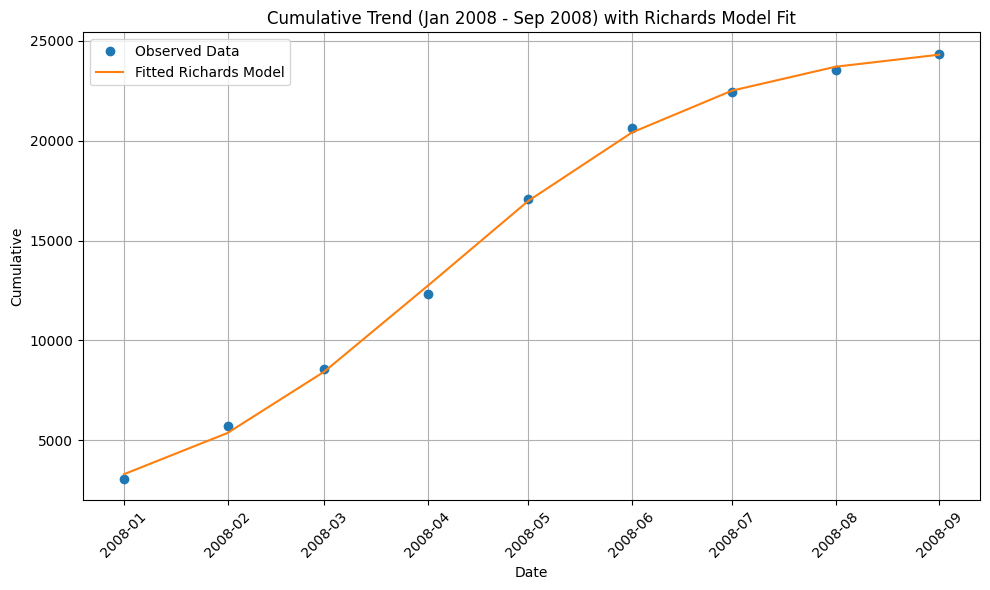

Fitted Parameters:
a (initial population): 1130.8181595454166
b (growth rate): 9.874341484858615
c (carrying capacity): 24845.13173817205
d (growth shape parameter): 0.024714874001879366


In [ ]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to September 2008
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2008-09-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract x (time) and y (cumulative) data
x_data = (filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values
y_data = filtered_df['cumulative'].values

# Define the Richards modification of the logistic model
def richards_model(t, a, b, c, d):
  """
  Richards model for population growth.

  Args:
    t: Time (independent variable).
    a: Initial population size.
    b: Growth rate.
    c: Carrying capacity.
    d: Growth shape parameter.

  Returns:
    The predicted population size at time t.
  """
  return a + (c - a) * (1 + (b * np.exp(-d * t))) ** (-1)

# Fit the model to the data
try:
  popt, _ = curve_fit(richards_model, x_data, y_data,
                      p0=[y_data[0], 1, np.max(y_data), 0.1],
                      maxfev=10000)  # Initial guess for parameters

  # Extract the fitted parameters
  a, b, c, d = popt

  # Generate predicted values for plotting
  x_fit = np.linspace(x_data.min(), x_data.max(), 100)
  y_fit = richards_model(x_fit, a, b, c, d)

  # Plot the data and the fitted curve
  plt.figure(figsize=(10, 6))
  plt.plot(filtered_df['Date'], y_data, 'o', label='Observed Data')
  plt.plot(filtered_df['Date'], richards_model(x_data, a, b, c, d), '-', label='Fitted Richards Model')

  plt.xlabel('Date')
  plt.ylabel('Cumulative')
  plt.title('Cumulative Trend (Jan 2008 - Sep 2008) with Richards Model Fit')
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  print("Fitted Parameters:")
  print("a (initial population):", a)
  print("b (growth rate):", b)
  print("c (carrying capacity):", c)
  print("d (growth shape parameter):", d)

except RuntimeError:
  print("Optimal parameters not found. Curve fitting may have failed.")

<ipython-input-10-1d2243643028>:36: RuntimeWarning: overflow encountered in exp
  return a1 + (c1 - a1) * (1 + (b1 * np.exp(-d1 * t))) ** (-1) + a2 + (c2 - a2) * (1 + (b2 * np.exp(-d2 * t))) ** (-1)


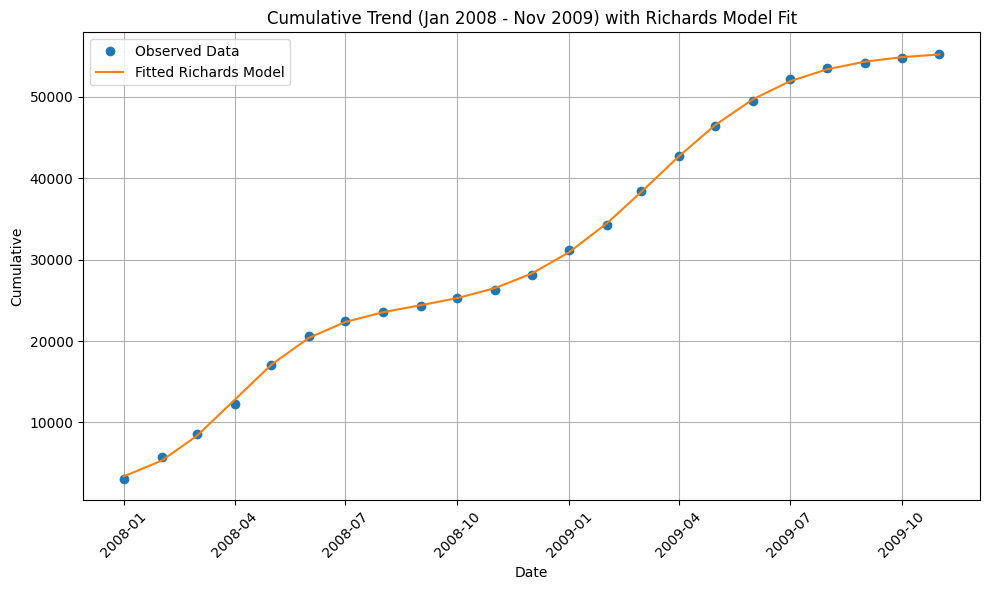

Fitted Parameters:
a1 (initial population): -4347055.858523812
b1 (growth rate): 2416.7132692053983
c1 (carrying capacity): -4315117.801747674
d1 (growth shape parameter): 0.01791245620222126
a2 (initial population): 4348695.042539637
b2 (growth rate): 11.695372066087984
c2 (carrying capacity): 4370796.251513534
d2 (growth shape parameter): 0.02706835370810802


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Replace 'your_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('DBD.xlsx')

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2009
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2009-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract x (time) and y (cumulative) data
x_data = (filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values
y_data = filtered_df['cumulative'].values

# Define the Richards modification of the logistic model
def richards_model(t, a1, b1, c1, d1, a2, b2, c2, d2):
  """
  Richards model for population growth.

  Args:
    t: Time (independent variable).
    a: Initial population size.
    b: Growth rate.
    c: Carrying capacity.
    d: Growth shape parameter.

  Returns:
    The predicted population size at time t.
  """
  return a1 + (c1 - a1) * (1 + (b1 * np.exp(-d1 * t))) ** (-1) + a2 + (c2 - a2) * (1 + (b2 * np.exp(-d2 * t))) ** (-1)

# Fit the model to the data
try:
  popt, _ = curve_fit(richards_model, x_data, y_data,
                      p0=[y_data[0], 1, np.max(y_data), 0.1, y_data[0], 1, np.max(y_data), 0.1],
                      maxfev=10000)  # Initial guess for parameters

  # Extract the fitted parameters
  a1, b1, c1, d1, a2, b2, c2, d2 = popt

  # Generate predicted values for plotting
  x_fit = np.linspace(x_data.min(), x_data.max(), 100)
  y_fit = richards_model(x_fit, a1, b1, c1, d1, a2, b2, c2, d2)

  # Plot the data and the fitted curve
  plt.figure(figsize=(10, 6))
  plt.plot(filtered_df['Date'], y_data, 'o', label='Observed Data')
  plt.plot(filtered_df['Date'], richards_model(x_data, a1, b1, c1, d1, a2, b2, c2, d2), '-', label='Fitted Richards Model')

  plt.xlabel('Date')
  plt.ylabel('Cumulative')
  plt.title('Cumulative Trend (Jan 2008 - Nov 2009) with Richards Model Fit')
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  print("Fitted Parameters:")
  print("a1 (initial population):", a1)
  print("b1 (growth rate):", b1)
  print("c1 (carrying capacity):", c1)
  print("d1 (growth shape parameter):", d1)
  print("a2 (initial population):", a2)
  print("b2 (growth rate):", b2)
  print("c2 (carrying capacity):", c2)
  print("d2 (growth shape parameter):", d2)

except RuntimeError:
  print("Optimal parameters not found. Curve fitting may have failed.")

<ipython-input-8-0d47345c23c1>:35: RuntimeWarning: overflow encountered in exp
  return a + (c - a) * (1 + (b * np.exp(-d * t))) ** (-1)
<ipython-input-8-0d47345c23c1>:35: RuntimeWarning: overflow encountered in multiply
  return a + (c - a) * (1 + (b * np.exp(-d * t))) ** (-1)


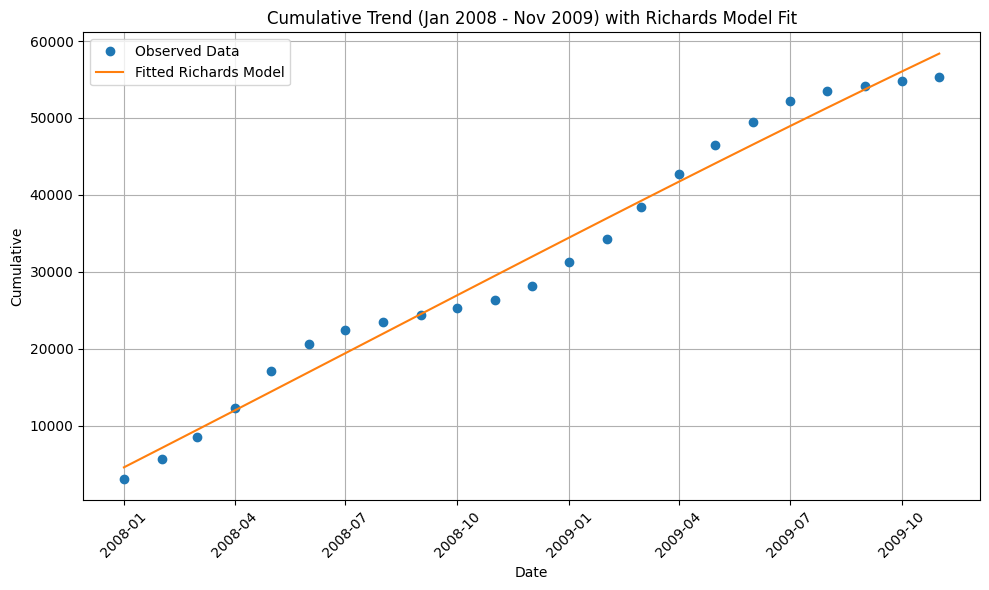

Fitted Parameters:
a (initial population): -111660.47146931189
b (growth rate): 1.2776006504026831
c (carrying capacity): 153074.12932526693
d (growth shape parameter): 0.0012390525135196296


In [ ]:
# prompt: fit the last column data from date january 2008 to november 2009 to the richards modification of the logistic model to model growth of biological populations



# Replace 'your_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('DBD.xlsx')

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2009
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2009-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract x (time) and y (cumulative) data
x_data = (filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values
y_data = filtered_df['cumulative'].values

# Define the Richards modification of the logistic model
def richards_model(t, a, b, c, d):
  """
  Richards model for population growth.

  Args:
    t: Time (independent variable).
    a: Initial population size.
    b: Growth rate.
    c: Carrying capacity.
    d: Growth shape parameter.

  Returns:
    The predicted population size at time t.
  """
  return a + (c - a) * (1 + (b * np.exp(-d * t))) ** (-1)

# Fit the model to the data
try:
  popt, _ = curve_fit(richards_model, x_data, y_data,
                      p0=[y_data[0], 1, np.max(y_data), 0.1],
                      maxfev=10000)  # Initial guess for parameters

  # Extract the fitted parameters
  a, b, c, d = popt

  # Generate predicted values for plotting
  x_fit = np.linspace(x_data.min(), x_data.max(), 100)
  y_fit = richards_model(x_fit, a, b, c, d)

  # Plot the data and the fitted curve
  plt.figure(figsize=(10, 6))
  plt.plot(filtered_df['Date'], y_data, 'o', label='Observed Data')
  plt.plot(filtered_df['Date'], richards_model(x_data, a, b, c, d), '-', label='Fitted Richards Model')

  plt.xlabel('Date')
  plt.ylabel('Cumulative')
  plt.title('Cumulative Trend (Jan 2008 - Nov 2009) with Richards Model Fit')
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  print("Fitted Parameters:")
  print("a (initial population):", a)
  print("b (growth rate):", b)
  print("c (carrying capacity):", c)
  print("d (growth shape parameter):", d)

except RuntimeError:
  print("Optimal parameters not found. Curve fitting may have failed.")

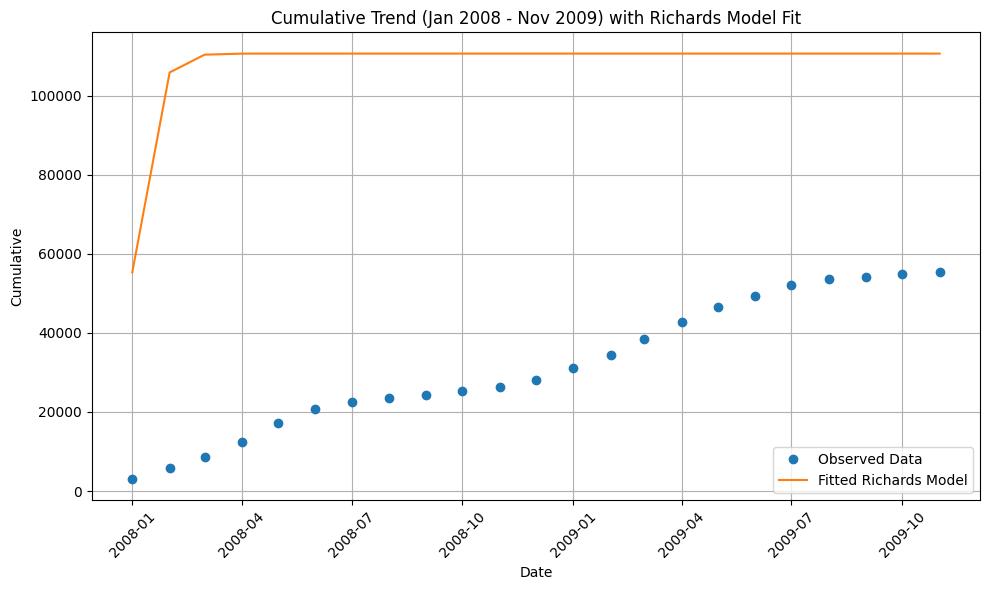

Fitted Parameters:
a1 (initial population): 0.0011511840720569797
b1 (growth rate): 1.0000404426246703
c1 (carrying capacity): 55314.3599677798
d1 (growth shape parameter): 0.09998705499598856
a2 (initial population): 0.0011511840720579963
b2 (growth rate): 1.0000404426246703
c2 (carrying capacity): 55314.3599677798
d2 (growth shape parameter): 0.09998705499598856


In [ ]:
# prompt: modifikasi kode diatas dengan tambahan syarat a1, a2, b1, b2, c1, c2, d1, d2 > 0

# Replace 'your_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('DBD.xlsx')

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the period January 2008 to November 2009
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2009-11-30')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract x (time) and y (cumulative) data
x_data = (filtered_df['Date'] - filtered_df['Date'].min()).dt.days.values
y_data = filtered_df['cumulative'].values

# Define the Richards modification of the logistic model
def richards_model(t, a1, b1, c1, d1, a2, b2, c2, d2):
  """
  Richards model for population growth.

  Args:
    t: Time (independent variable).
    a1, a2: Initial population size.
    b1, b2: Growth rate.
    c1, c2: Carrying capacity.
    d1, d2: Growth shape parameter.

  Returns:
    The predicted population size at time t.
  """
  if a1 <= 0 or b1 <= 0 or c1 <= 0 or d1 <= 0 or a2 <= 0 or b2 <= 0 or c2 <= 0 or d2 <= 0:
    return np.inf  # Or any other appropriate value to indicate an invalid fit

  return a1 + (c1 - a1) * (1 + (b1 * np.exp(-d1 * t))) ** (-1) + a2 + (c2 - a2) * (1 + (b2 * np.exp(-d2 * t))) ** (-1)

# Fit the model to the data
try:
  popt, _ = curve_fit(richards_model, x_data, y_data,
                      p0=[1, 1, np.max(y_data), 0.1, 1, 1, np.max(y_data), 0.1],
                      maxfev=10000)  # Initial guess for parameters

  # Extract the fitted parameters
  a1, b1, c1, d1, a2, b2, c2, d2 = popt

  # Generate predicted values for plotting
  x_fit = np.linspace(x_data.min(), x_data.max(), 100)
  y_fit = richards_model(x_fit, a1, b1, c1, d1, a2, b2, c2, d2)

  # Plot the data and the fitted curve
  plt.figure(figsize=(10, 6))
  plt.plot(filtered_df['Date'], y_data, 'o', label='Observed Data')
  plt.plot(filtered_df['Date'], richards_model(x_data, a1, b1, c1, d1, a2, b2, c2, d2), '-', label='Fitted Richards Model')

  plt.xlabel('Date')
  plt.ylabel('Cumulative')
  plt.title('Cumulative Trend (Jan 2008 - Nov 2009) with Richards Model Fit')
  plt.xticks(rotation=45)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  print("Fitted Parameters:")
  print("a1 (initial population):", a1)
  print("b1 (growth rate):", b1)
  print("c1 (carrying capacity):", c1)
  print("d1 (growth shape parameter):", d1)
  print("a2 (initial population):", a2)
  print("b2 (growth rate):", b2)
  print("c2 (carrying capacity):", c2)
  print("d2 (growth shape parameter):", d2)

except RuntimeError:
  print("Optimal parameters not found. Curve fitting may have failed.")